In [59]:
path = '/content/drive/MyDrive/malaria/malaria_clinical_data1.csv'

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [61]:
dataset = pd.read_csv(path)

In [62]:
dataset

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,0vrongo,2004,0,Yes,38.0,Not Known / Missing entry,0,Positive,...,156,8,7,62,32,7,4,2,0,19
1,CCS20102,yes,0vrongo,2004,0,Yes,38.2,Not Known / Missing entry,0,Positive,...,55,17,8,69,24,8,5,2,1,14
2,CCS20106,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,...,20,2,6,33,53,14,3,4,1,18
3,CCS20147,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,...,132,17,6,83,12,6,13,2,1,14
4,CCS20170,yes,0vrongo,2004,0,Yes,37.1,Not Known / Missing entry,0,Positive,...,85,16,7,84,11,5,4,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,KC366,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,...,277,12,7,71,23,6,9,3,1,16
2203,KC368,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,...,340,15,7,74,21,5,6,2,0,15
2204,KC369,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,...,300,14,7,44,49,7,4,5,1,18
2205,KC370,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,...,136,13,7,35,58,7,4,7,1,14


In [63]:
dataset = dataset.drop('SampleID', axis = 1)

In [64]:
dataset

,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,Blood_culture,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,yes,0vrongo,2004,0,Yes,38.0,Not Known / Missing entry,0,Positive,0,...,156,8,7,62,32,7,4,2,0,19
1,yes,0vrongo,2004,0,Yes,38.2,Not Known / Missing entry,0,Positive,0,...,55,17,8,69,24,8,5,2,1,14
2,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,0,...,20,2,6,33,53,14,3,4,1,18
3,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,0,...,132,17,6,83,12,6,13,2,1,14
4,yes,0vrongo,2004,0,Yes,37.1,Not Known / Missing entry,0,Positive,0,...,85,16,7,84,11,5,4,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,0,...,277,12,7,71,23,6,9,3,1,16
2203,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,0,...,340,15,7,74,21,5,6,2,0,15
2204,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,0,...,300,14,7,44,49,7,4,5,1,18
2205,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,0,...,136,13,7,35,58,7,4,7,1,14


In [65]:
dataset['Clinical_Diagnosis']

0       1
1       1
2       1
3       1
4       1
       ..
2202    1
2203    0
2204    0
2205    0
2206    0
Name: Clinical_Diagnosis, Length: 2207, dtype: int64

In [66]:
dataset.columns

Index(['consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [67]:
dataset = dataset.reindex(['Clinical_Diagnosis','consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'], axis = 1)

In [68]:
dataset

,Clinical_Diagnosis,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,1,yes,0vrongo,2004,0,Yes,38.0,Not Known / Missing entry,0,Positive,...,156,8,7,62,32,7,4,2,0,19
1,1,yes,0vrongo,2004,0,Yes,38.2,Not Known / Missing entry,0,Positive,...,55,17,8,69,24,8,5,2,1,14
2,1,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,...,20,2,6,33,53,14,3,4,1,18
3,1,yes,0vrongo,2004,0,Yes,37.7,Not Known / Missing entry,0,Positive,...,132,17,6,83,12,6,13,2,1,14
4,1,yes,0vrongo,2004,0,Yes,37.1,Not Known / Missing entry,0,Positive,...,85,16,7,84,11,5,4,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,1,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,...,277,12,7,71,23,6,9,3,1,16
2203,0,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,...,340,15,7,74,21,5,6,2,0,15
2204,0,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,...,300,14,7,44,49,7,4,5,1,18
2205,0,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,...,136,13,7,35,58,7,4,7,1,14


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   int64  
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  2207 non-null   object 
 5   fever_symptom           2207 non-null   object 
 6   temperature             2207 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     2207 non-null   object 
 9   RDT                     2207 non-null   object 
 10  Blood_culture           1876 non-null   object 
 11  Urine_culture           2203 non-null   object 
 12  Taq_man_PCR             2203 non-null   object 
 13  parasite_density        2204 non-null   float64
 14  Microscopy              2207 non-null   

In [70]:
from sklearn.preprocessing import LabelEncoder

dataset['consent_given'] = LabelEncoder().fit_transform(dataset['consent_given'])
dataset['location'] = LabelEncoder().fit_transform(dataset['location'])
dataset['Suspected_Organism'] = LabelEncoder().fit_transform(dataset['Suspected_Organism'])
dataset['bednet'] = LabelEncoder().fit_transform(dataset['bednet'])
dataset['fever_symptom'] = LabelEncoder().fit_transform(dataset['fever_symptom'])
dataset['Suspected_Organism'] = LabelEncoder().fit_transform(dataset['Suspected_Organism'])
dataset['Suspected_infection'] = LabelEncoder().fit_transform(dataset['Suspected_infection'])
dataset['RDT'] = LabelEncoder().fit_transform(dataset['RDT'])
dataset['Blood_culture'] = LabelEncoder().fit_transform(dataset['Blood_culture'])
dataset['Taq_man_PCR'] = LabelEncoder().fit_transform(dataset['Taq_man_PCR'])
dataset['Urine_culture'] = LabelEncoder().fit_transform(dataset['Urine_culture'])
dataset['Microscopy'] = LabelEncoder().fit_transform(dataset['Microscopy'])
dataset['Laboratory_Results'] = LabelEncoder().fit_transform(dataset['Laboratory_Results'])

In [71]:
dataset

,Clinical_Diagnosis,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,1,1,0,2004,0,2,38.0,4,5,2,...,156,8,7,62,32,7,4,2,0,19
1,1,1,0,2004,0,2,38.2,4,5,2,...,55,17,8,69,24,8,5,2,1,14
2,1,1,0,2004,0,2,37.7,4,5,2,...,20,2,6,33,53,14,3,4,1,18
3,1,1,0,2004,0,2,37.7,4,5,2,...,132,17,6,83,12,6,13,2,1,14
4,1,1,0,2004,0,2,37.1,4,5,2,...,85,16,7,84,11,5,4,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,1,1,2,2017,4,1,37.1,1,126,2,...,277,12,7,71,23,6,9,3,1,16
2203,0,1,2,2017,3,1,36.7,1,88,1,...,340,15,7,74,21,5,6,2,0,15
2204,0,1,2,2017,4,1,36.4,0,41,1,...,300,14,7,44,49,7,4,5,1,18
2205,0,1,2,2017,4,1,37.4,4,225,1,...,136,13,7,35,58,7,4,7,1,14


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   int64  
 1   consent_given           2207 non-null   int64  
 2   location                2207 non-null   int64  
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  2207 non-null   int64  
 5   fever_symptom           2207 non-null   int64  
 6   temperature             2207 non-null   float64
 7   Suspected_Organism      2207 non-null   int64  
 8   Suspected_infection     2207 non-null   int64  
 9   RDT                     2207 non-null   int64  
 10  Blood_culture           2207 non-null   int64  
 11  Urine_culture           2207 non-null   int64  
 12  Taq_man_PCR             2207 non-null   int64  
 13  parasite_density        2204 non-null   float64
 14  Microscopy              2207 non-null   

In [73]:
dataset

,Clinical_Diagnosis,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,1,1,0,2004,0,2,38.0,4,5,2,...,156,8,7,62,32,7,4,2,0,19
1,1,1,0,2004,0,2,38.2,4,5,2,...,55,17,8,69,24,8,5,2,1,14
2,1,1,0,2004,0,2,37.7,4,5,2,...,20,2,6,33,53,14,3,4,1,18
3,1,1,0,2004,0,2,37.7,4,5,2,...,132,17,6,83,12,6,13,2,1,14
4,1,1,0,2004,0,2,37.1,4,5,2,...,85,16,7,84,11,5,4,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,1,1,2,2017,4,1,37.1,1,126,2,...,277,12,7,71,23,6,9,3,1,16
2203,0,1,2,2017,3,1,36.7,1,88,1,...,340,15,7,74,21,5,6,2,0,15
2204,0,1,2,2017,4,1,36.4,0,41,1,...,300,14,7,44,49,7,4,5,1,18
2205,0,1,2,2017,4,1,37.4,4,225,1,...,136,13,7,35,58,7,4,7,1,14


In [74]:
from sklearn.preprocessing import MinMaxScaler

obj = MinMaxScaler(feature_range = (0,1))
obj = obj.fit(dataset)
normal_dataset = obj.transform(dataset)

In [75]:
normal_dataset = pd.DataFrame(normal_dataset, columns= dataset.columns)

In [76]:
normal_dataset

,Clinical_Diagnosis,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,1.0,1.0,0.0,0.117647,0.00,1.0,0.924574,0.500,0.018248,1.0,...,0.169750,0.333333,0.368421,0.630952,0.358974,0.259259,0.095238,0.071429,0.000000,0.655172
1,1.0,1.0,0.0,0.117647,0.00,1.0,0.929440,0.500,0.018248,1.0,...,0.059848,0.708333,0.421053,0.714286,0.256410,0.296296,0.119048,0.071429,0.166667,0.482759
2,1.0,1.0,0.0,0.117647,0.00,1.0,0.917275,0.500,0.018248,1.0,...,0.021763,0.083333,0.315789,0.285714,0.628205,0.518519,0.071429,0.142857,0.166667,0.620690
3,1.0,1.0,0.0,0.117647,0.00,1.0,0.917275,0.500,0.018248,1.0,...,0.143634,0.708333,0.315789,0.880952,0.102564,0.222222,0.309524,0.071429,0.166667,0.482759
4,1.0,1.0,0.0,0.117647,0.00,1.0,0.902676,0.500,0.018248,1.0,...,0.092492,0.666667,0.368421,0.892857,0.089744,0.185185,0.095238,0.035714,0.000000,0.517241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,1.0,1.0,1.0,0.882353,1.00,0.5,0.902676,0.125,0.459854,1.0,...,0.301415,0.500000,0.368421,0.738095,0.243590,0.222222,0.214286,0.107143,0.166667,0.551724
2203,0.0,1.0,1.0,0.882353,0.75,0.5,0.892944,0.125,0.321168,0.5,...,0.369967,0.625000,0.368421,0.773810,0.217949,0.185185,0.142857,0.071429,0.000000,0.517241
2204,0.0,1.0,1.0,0.882353,1.00,0.5,0.885645,0.000,0.149635,0.5,...,0.326442,0.583333,0.368421,0.416667,0.576923,0.259259,0.095238,0.178571,0.166667,0.620690
2205,0.0,1.0,1.0,0.882353,1.00,0.5,0.909976,0.500,0.821168,0.5,...,0.147987,0.541667,0.368421,0.309524,0.692308,0.259259,0.095238,0.250000,0.166667,0.482759


In [77]:
normal_dataset = normal_dataset.dropna()

In [78]:
normal_dataset.isna().any()

Clinical_Diagnosis        False
consent_given             False
location                  False
Enrollment_Year           False
bednet                    False
fever_symptom             False
temperature               False
Suspected_Organism        False
Suspected_infection       False
RDT                       False
Blood_culture             False
Urine_culture             False
Taq_man_PCR               False
parasite_density          False
Microscopy                False
Laboratory_Results        False
wbc_count                 False
rbc_count                 False
hb_level                  False
hematocrit                False
mean_cell_volume          False
mean_corp_hb              False
mean_cell_hb_conc         False
platelet_count            False
platelet_distr_width      False
mean_platelet_vl          False
neutrophils_percent       False
lymphocytes_percent       False
mixed_cells_percent       False
neutrophils_count         False
lymphocytes_count         False
mixed_ce

In [79]:
Q1 = normal_dataset.quantile(0.25)
Q2 =normal_dataset.quantile(0.50)
Q3 = normal_dataset.quantile(0.75)

IQR = Q3-Q1

In [80]:
IQR

Clinical_Diagnosis        1.000000
consent_given             0.000000
location                  1.000000
Enrollment_Year           0.294118
bednet                    0.250000
fever_symptom             0.000000
temperature               0.048662
Suspected_Organism        0.000000
Suspected_infection       0.489051
RDT                       0.500000
Blood_culture             0.000000
Urine_culture             0.000000
Taq_man_PCR               0.000000
parasite_density          0.003558
Microscopy                0.500000
Laboratory_Results        0.400000
wbc_count                 0.113208
rbc_count                 0.333333
hb_level                  0.166667
hematocrit                0.224490
mean_cell_volume          0.088496
mean_corp_hb              0.102564
mean_cell_hb_conc         0.063830
platelet_count            0.212187
platelet_distr_width      0.125000
mean_platelet_vl          0.105263
neutrophils_percent       0.309524
lymphocytes_percent       0.294872
mixed_cells_percent 

In [81]:
upper = Q3 +(1.5*IQR)
lower = Q1 - (1.5*IQR)
# normal_dataset = normal_dataset[~((normal_dataset < (Q1 - 1.5 * IQR)) |(normal_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


In [82]:
data = normal_dataset.iloc[:,1:]
labels = normal_dataset.iloc[:,0]

In [83]:
data.shape

(2204, 32)

In [84]:
labels.shape

(2204,)

In [85]:
normal_dataset.corr()

,Clinical_Diagnosis,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
Clinical_Diagnosis,1.000000,0.086243,-0.321152,-0.583546,-0.439967,0.367460,0.092067,0.138237,-0.459980,0.689752,...,-0.573437,-0.076174,-0.162297,0.181082,-0.168825,-0.140557,0.078844,-0.030797,-0.075325,0.292786
consent_given,0.086243,1.000000,-0.018077,-0.044989,-0.031680,-0.000113,-0.002196,0.013927,-0.047792,0.054336,...,-0.065511,0.181382,0.223318,0.014024,-0.015126,-0.005354,0.083407,0.077412,0.062579,0.254128
location,-0.321152,-0.018077,1.000000,0.748822,0.754016,-0.265134,-0.094803,-0.174767,0.463346,-0.294970,...,0.238705,-0.045086,0.190960,0.033526,-0.018192,-0.083297,-0.099553,-0.167714,-0.166778,-0.236754
Enrollment_Year,-0.583546,-0.044989,0.748822,1.000000,0.897161,-0.339348,-0.110199,-0.091819,0.642196,-0.577209,...,0.427743,0.050025,0.348954,0.038272,-0.047562,0.021288,-0.166815,-0.239249,-0.134508,-0.412539
bednet,-0.439967,-0.031680,0.754016,0.897161,1.000000,-0.256352,-0.106849,-0.079184,0.617642,-0.439999,...,0.334996,0.062923,0.288448,0.091317,-0.085842,-0.069095,-0.155547,-0.263811,-0.193550,-0.359972
fever_symptom,0.367460,-0.000113,-0.265134,-0.339348,-0.256352,1.000000,0.278056,0.149174,-0.218837,0.267981,...,-0.269770,-0.018473,-0.136031,0.225014,-0.228543,-0.091242,0.207693,0.000879,0.048864,0.121093
temperature,0.092067,-0.002196,-0.094803,-0.110199,-0.106849,0.278056,1.000000,0.068097,-0.046466,0.186699,...,-0.091353,0.010969,-0.030199,0.100050,-0.101773,-0.040875,0.091845,0.003230,0.025411,0.040666
Suspected_Organism,0.138237,0.013927,-0.174767,-0.091819,-0.079184,0.149174,0.068097,1.000000,-0.084727,0.118389,...,-0.130800,0.043210,0.014245,0.028306,-0.030709,-0.002111,-0.048597,-0.062986,-0.022034,-0.014530
Suspected_infection,-0.459980,-0.047792,0.463346,0.642196,0.617642,-0.218837,-0.046466,-0.084727,1.000000,-0.331658,...,0.324350,0.057535,0.198027,0.036389,-0.039511,-0.003059,-0.071536,-0.139413,-0.067760,-0.279368
RDT,0.689752,0.054336,-0.294970,-0.577209,-0.439999,0.267981,0.186699,0.118389,-0.331658,1.000000,...,-0.426488,-0.039689,-0.268480,0.062520,-0.039225,-0.131457,0.097716,0.073316,-0.020667,0.305399


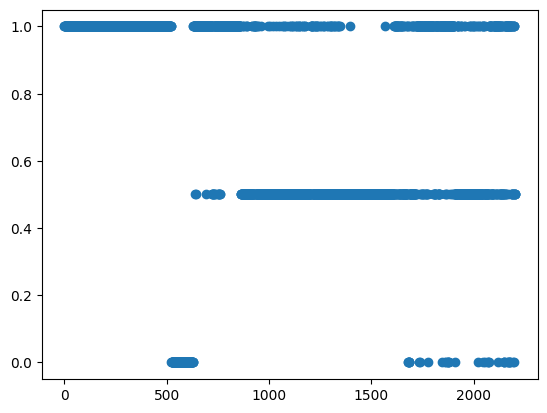

In [86]:
plt.scatter(np.arange(0, len(normal_dataset['RDT']), 1) , normal_dataset['RDT'])

(array([ 142.,    0.,    0.,    0.,    0.,  969.,    0.,    0.,    0.,
        1093.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

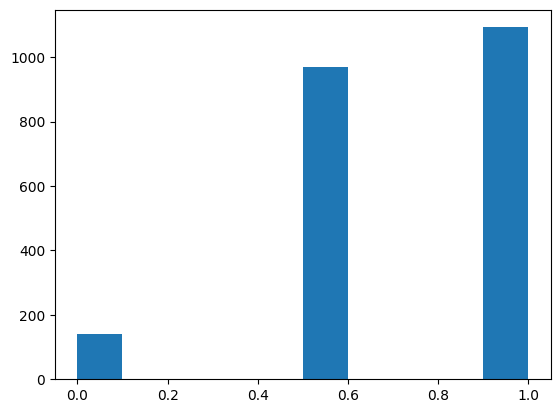

In [87]:
plt.hist(normal_dataset['RDT'])

array([[<Axes: xlabel='location', ylabel='location'>,
        <Axes: xlabel='Enrollment_Year', ylabel='location'>,
        <Axes: xlabel='bednet', ylabel='location'>,
        <Axes: xlabel='fever_symptom', ylabel='location'>],
       [<Axes: xlabel='location', ylabel='Enrollment_Year'>,
        <Axes: xlabel='Enrollment_Year', ylabel='Enrollment_Year'>,
        <Axes: xlabel='bednet', ylabel='Enrollment_Year'>,
        <Axes: xlabel='fever_symptom', ylabel='Enrollment_Year'>],
       [<Axes: xlabel='location', ylabel='bednet'>,
        <Axes: xlabel='Enrollment_Year', ylabel='bednet'>,
        <Axes: xlabel='bednet', ylabel='bednet'>,
        <Axes: xlabel='fever_symptom', ylabel='bednet'>],
       [<Axes: xlabel='location', ylabel='fever_symptom'>,
        <Axes: xlabel='Enrollment_Year', ylabel='fever_symptom'>,
        <Axes: xlabel='bednet', ylabel='fever_symptom'>,
        <Axes: xlabel='fever_symptom', ylabel='fever_symptom'>]],
      dtype=object)

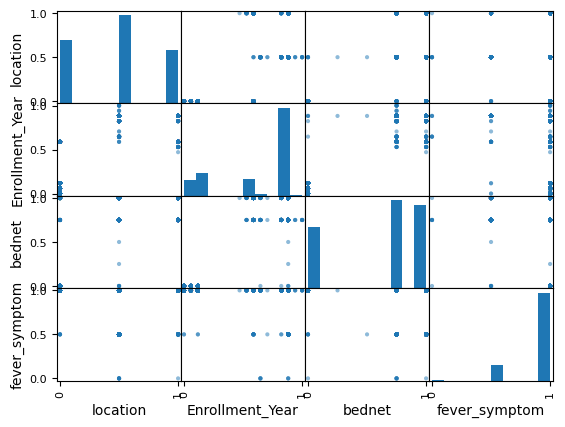

In [88]:
pd.plotting.scatter_matrix(data.iloc[0:2000, 1:5])

In [89]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(x_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (1410, 32)
X_test shape: (441, 32)
y_train shape: (1410,)
y_test shape: (441,)
X_val shape: (353, 32)
y val shape: (353,)


In [ ]:
!pip install scikit-plot

accuracy =  0.9909297052154195
     0    1
0  188    1
1    3  249
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       189
         1.0       1.00      0.99      0.99       252

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



TypeError: ignored

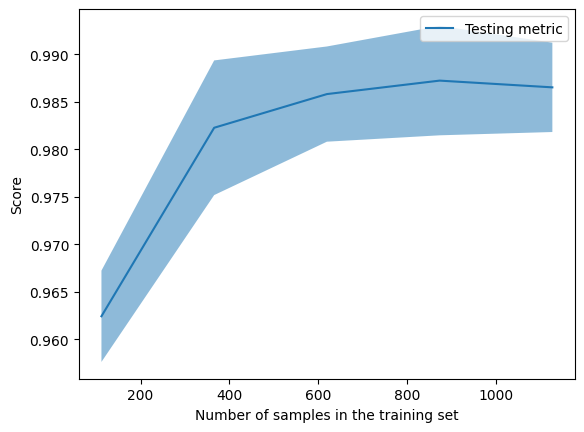

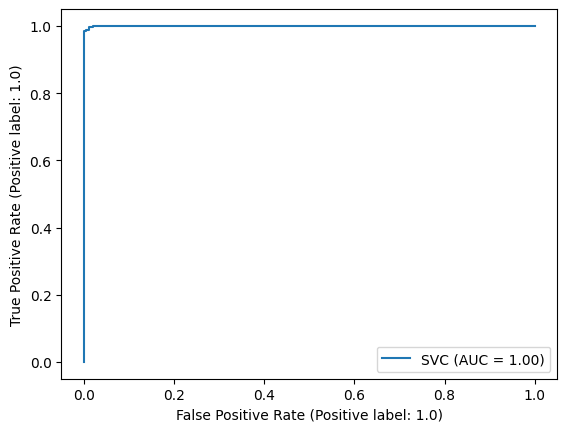

In [121]:
from sklearn.svm import SVC
from sklearn.model_selection import LearningCurveDisplay


model = SVC().fit(x_train, y_train)
y_pred = model.predict(x_test)


LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), x_train, y_train, cv=5)


from sklearn.metrics import RocCurveDisplay
svc_disp =RocCurveDisplay.from_estimator(model, x_test, y_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

print('accuracy = ', accuracy_score(y_test, y_pred))


print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

print(classification_report(y_test, y_pred))




accuracy =  1.0
     0    1
0  189    0
1    0  252
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       189
         1.0       1.00      1.00      1.00       252

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



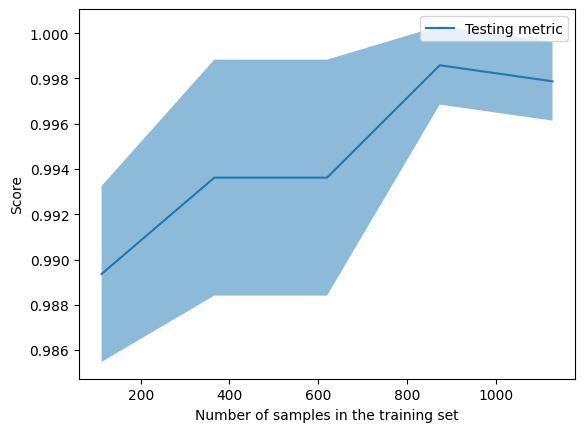

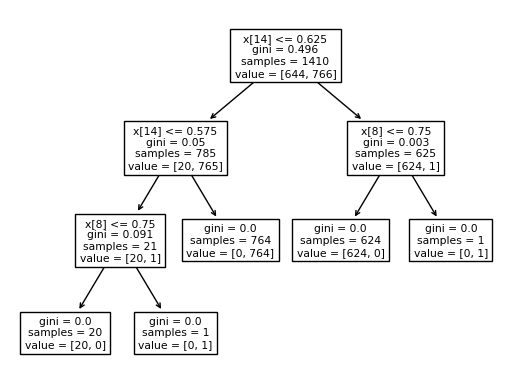

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)

LearningCurveDisplay.from_estimator(
  DecisionTreeClassifier(), x_train, y_train, cv=5)

from sklearn.metrics import RocCurveDisplay
svc_disp =RocCurveDisplay.from_estimator(model, x_test, y_test)

tree.plot_tree(model)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

print('accuracy = ', accuracy_score(y_test, y_pred))


print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy =  0.9886621315192744
     0    1
0  185    4
1    1  251
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       189
         1.0       0.98      1.00      0.99       252

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



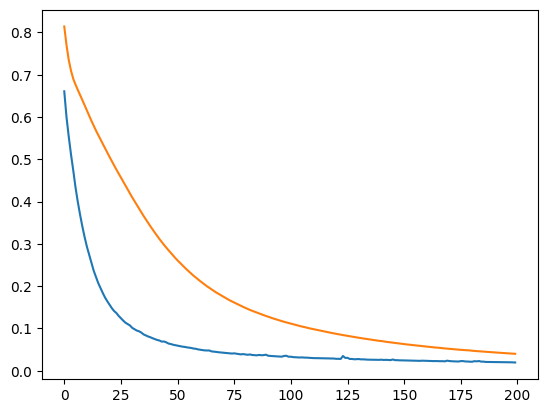

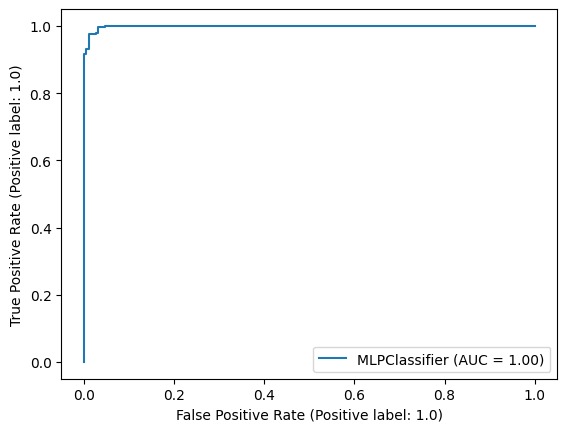

In [109]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.plot(model.loss_curve_)
model.fit(x_val,y_val)
plt.plot(model.loss_curve_);

from sklearn.metrics import RocCurveDisplay
svc_disp =RocCurveDisplay.from_estimator(model, x_test, y_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

print('accuracy = ', accuracy_score(y_test, y_pred))


print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

print(classification_report(y_test, y_pred))

accuracy =  1.0
     0    1
0  189    0
1    0  252
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       189
         1.0       1.00      1.00      1.00       252

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



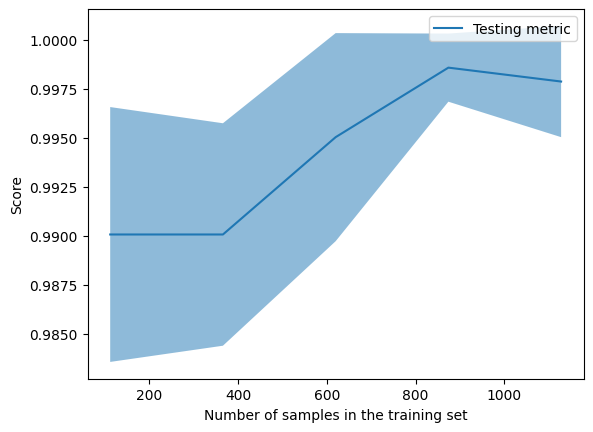

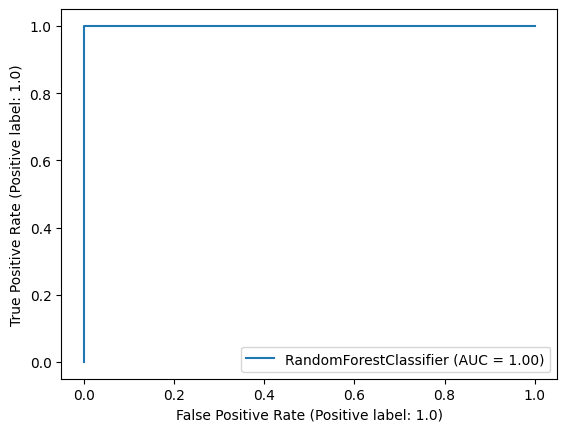

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)

LearningCurveDisplay.from_estimator(
  RandomForestClassifier(), x_train, y_train, cv=5)

from sklearn.metrics import RocCurveDisplay
svc_disp =RocCurveDisplay.from_estimator(model, x_test, y_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

print('accuracy = ', accuracy_score(y_test, y_pred))


print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

print(classification_report(y_test, y_pred))

In [94]:
from tensorflow import keras
from keras.layers import Dense, Conv1D, BatchNormalization, MaxPooling1D, Input, Dropout, Flatten
from keras.models import Sequential

In [95]:
x_train.shape

(1410, 32)

In [134]:
model = Sequential()
model.add(Input(shape = (32,1)))
model.add(Conv1D(filters = 64, kernel_size = 3, strides= 1, padding= "valid"))
model.add(MaxPooling1D(pool_size= 2, strides= None, padding= "valid"))
model.add(BatchNormalization())
model.add(Conv1D(filters = 64, kernel_size = 3, strides= 1, padding= "valid"))
model.add(MaxPooling1D(pool_size= 2, strides= None, padding= "valid"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))

In [135]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [98]:
from keras.callbacks import EarlyStopping

cal =  EarlyStopping(patience= 15, monitor = 'val_loss')
result = model.fit(x_train, y_train, epochs = 100, batch_size=8,
          validation_data = (x_val, y_val), callbacks= [cal])

Epoch 1/100
177/177 [==============================] - 4s 8ms/step - loss: 0.0461 - accuracy: 0.9830 - val_loss: 0.2738 - val_accuracy: 0.9943
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.0679 - val_accuracy: 0.9972
Epoch 3/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0122 - accuracy: 0.9943 - val_loss: 0.0157 - val_accuracy: 0.9972
Epoch 4/100
177/177 [==============================] - 1s 5ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0390 - val_accuracy: 0.9915
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.0184 - val_accuracy: 0.9943
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0204 - val_accuracy: 0.9915
Epoch 7/100
177/177 [==============================] - 1s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0250 - val_accuracy: 0.9915

In [99]:
y_pred = model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, 0)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

print('accuracy = ', accuracy_score(y_test, y_pred))


print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

print(classification_report(y_test, y_pred))

14/14 [==============================] - 0s 6ms/step
accuracy =  0.9954648526077098
     0    1
0  188    1
1    1  251
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       189
         1.0       1.00      1.00      1.00       252

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



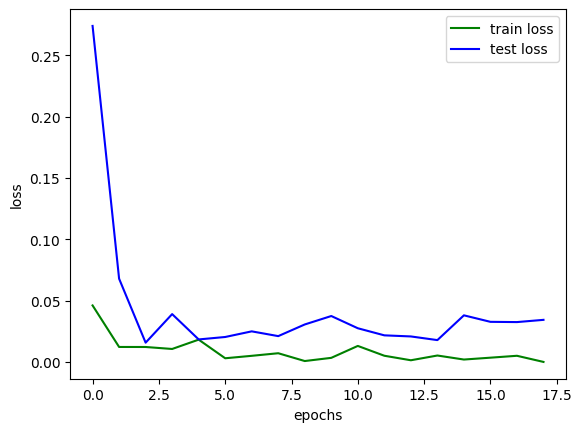

In [100]:
plt.plot(result.history['loss'], c = 'g', label = 'train loss')
plt.plot(result.history['val_loss'], c = 'b', label = 'test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

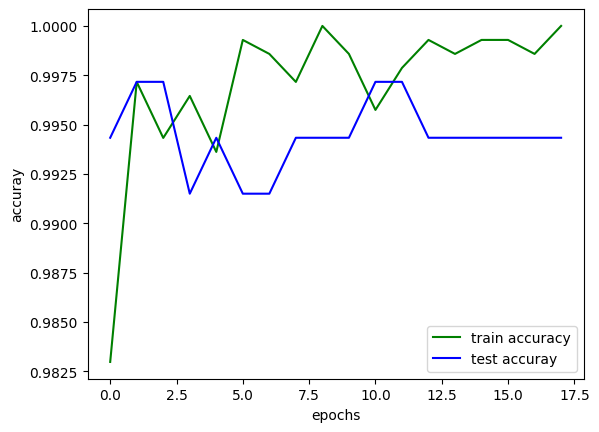

In [101]:
plt.plot(result.history['accuracy'], c = 'g', label = 'train accuracy')
plt.plot(result.history['val_accuracy'], c = 'b', label = 'test accuray')
plt.xlabel('epochs')
plt.ylabel('accuray')
plt.legend()

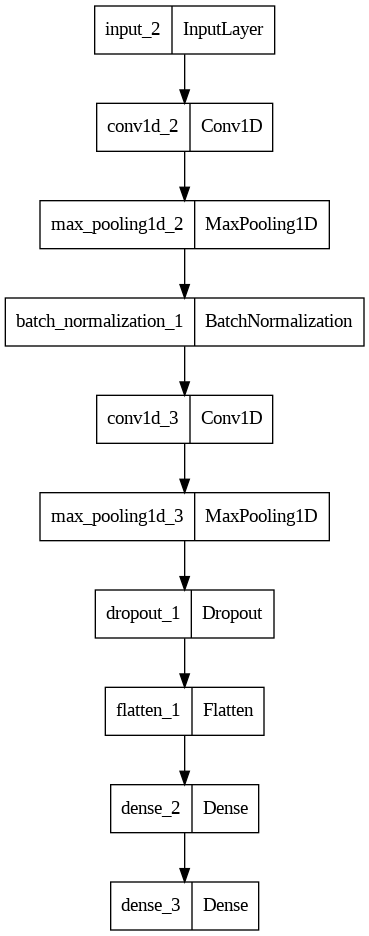

In [102]:
keras.utils.plot_model(model)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


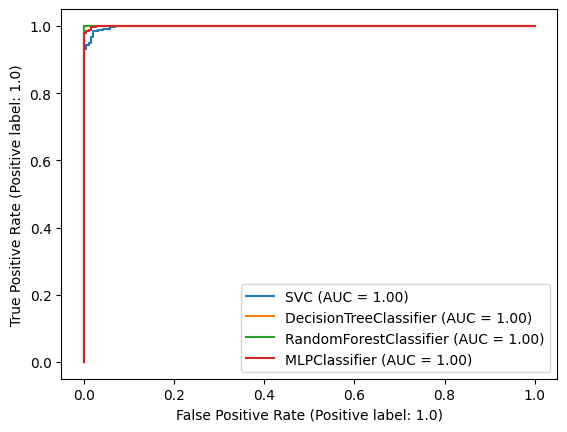

In [138]:
from sklearn.metrics import RocCurveDisplay

svc = SVC(kernel="rbf", gamma=0.001).fit(x_train, y_train)
mlp = MLPClassifier().fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)
dt = DecisionTreeClassifier().fit(x_train, y_train)


svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=svc_disp.ax_)
rf_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=dt_disp.ax_)
mlp_disp = RocCurveDisplay.from_estimator(mlp, x_test, y_test, ax=rf_disp.ax_)
